# **Madrid Airbnb: What are affordable neighbourhoods for rentals?**

![madrid_image](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/4_Torres_desde_CBA_Bellas_Artes_%28Zoom_14%29_-_panoramio_%28crop%29.jpg/1920px-4_Torres_desde_CBA_Bellas_Artes_%28Zoom_14%29_-_panoramio_%28crop%29.jpg)

# CRISP-DM Process
1. Business Understanding:
From the madrid dataset. We are interested in knowing the afforable negiborhood for rentals and as well as answer following business questions:
 * **Question 1:** What is the Average daily price per neighbourhood wise along with ratings?
 * **Question 2:** What are the most frequent amenities in Madrid?
 * **Question 3:**  What are the most important features that contribute to Airbnb price? 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/madrid-airbnb-data/calendar.csv
/kaggle/input/madrid-airbnb-data/listings.csv
/kaggle/input/madrid-airbnb-data/listings_detailed.csv
/kaggle/input/madrid-airbnb-data/neighbourhoods.geojson
/kaggle/input/madrid-airbnb-data/reviews.csv
/kaggle/input/madrid-airbnb-data/reviews_detailed.csv
/kaggle/input/madrid-airbnb-data/neighbourhoods.csv


In [2]:
#plots librabries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
#Maps Librabries
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.element import Figure
from branca.colormap import LinearColormap
#Machine Learning Librabries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer

In [40]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

numpy==1.19.5
pandas==1.2.3
seaborn==0.11.1
folium==0.12.1
geopandas==0.9.0


# Data Understanding


In [3]:
#Loading all the datasets
pd.set_option('display.max_columns', None)
calendar = pd.read_csv("../input/madrid-airbnb-data/calendar.csv")
listings = pd.read_csv("../input/madrid-airbnb-data/listings_detailed.csv")
neighbourhoods = pd.read_csv("../input/madrid-airbnb-data/neighbourhoods.csv")
reviews = pd.read_csv("../input/madrid-airbnb-data/reviews_detailed.csv")

In [4]:
listings.shape

(19618, 74)

So, The original dataset consists of 19618 listings and 74 columns.

In [5]:
#Know number of NaNs values in total per column
listings.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               3
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               5637
Length: 74, dtype: int64

**Concise summary of a DataFrame**

In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19618 non-null  int64  
 1   listing_url                                   19618 non-null  object 
 2   scrape_id                                     19618 non-null  int64  
 3   last_scraped                                  19618 non-null  object 
 4   name                                          19615 non-null  object 
 5   description                                   18480 non-null  object 
 6   neighborhood_overview                         11556 non-null  object 
 7   picture_url                                   19617 non-null  object 
 8   host_id                                       19618 non-null  int64  
 9   host_url                                      19618 non-null 

In [7]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.961800e+04,1.961800e+04,1.961800e+04,19091.000000,19091.000000,19618.000000,19618.000000,19618.000000,0.0,18123.000000,19218.000000,19618.000000,19618.000000,19617.000000,19617.000000,19617.000000,19617.000000,19617.000000,19617.000000,0.0,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,13713.000000,13701.000000,13704.000000,13703.000000,13703.000000,13700.000000,13699.000000,19618.000000,19618.000000,19618.000000,19618.000000,13981.000000
mean,2.912200e+07,2.021041e+13,1.312165e+08,12.114557,12.114557,40.420984,-3.694040,3.110154,NaN,1.440821,1.955250,6.586196,736.656336,6.397614,7.537493,828.938574,839.761533,6.966396,832.631962,NaN,12.413702,27.468804,43.837547,159.098328,31.858803,2.105668,0.263686,92.462116,9.501569,9.339682,9.644749,9.643655,9.657518,9.177166,10.229177,8.219645,1.755582,0.169691,1.125958
std,1.351839e+07,0.000000e+00,1.166790e+08,101.803820,101.803820,0.022627,0.028671,1.963693,NaN,0.829369,1.541055,33.286582,1333.788410,31.296555,33.629706,1323.041916,1320.928824,31.757274,1321.751986,NaN,13.196053,26.635151,39.680185,144.252803,63.938997,6.533315,0.916089,10.218623,0.991615,1.087092,0.898459,0.922123,0.783949,1.078839,23.546472,22.727000,5.147105,1.654240,1.348235
min,6.369000e+03,2.021041e+13,7.952000e+03,0.000000,0.000000,40.332210,-3.863910,0.000000,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.903424e+07,2.021041e+13,2.765313e+07,1.000000,1.000000,40.409393,-3.707700,2.000000,NaN,1.000000,1.000000,1.000000,90.000000,1.000000,1.000000,365.000000,365.000000,1.000000,365.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.170000
50%,3.187506e+07,2.021041e+13,9.901898e+07,2.000000,2.000000,40.419735,-3.701120,2.000000,NaN,1.000000,2.000000,2.000000,1125.000000,2.000000,2.000000,1125.000000,1125.000000,2.000000,1125.000000,NaN,5.000000,23.000000,44.000000,126.000000,4.000000,0.000000,0.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.000000,0.000000,0.000000,0.590000
75%,4.090994e+07,2.021041e+13,2.256898e+08,6.000000,6.000000,40.430290,-3.685420,4.000000,NaN,2.000000,2.000000,3.000000,1125.000000,3.000000,4.000000,1125.000000,1125.000000,3.700000,1125.000000,NaN,29.000000,58.000000,88.000000,320.000000,31.000000,1.000000,0.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,3.000000,1.000000,0.000000,1.630000
max,4.918779e+07,2.021041e+13,3.964281e+08,7755.000000,7755.000000,40.562740,-3.531900,16.000000,NaN,15.000000,50.000000,1125.000000,142365.000000,1125.000000,1125.000000,142365.000000,142365.000000,1125.000000,142365.000000,NaN,30.000000,60.000000,90.000000,365.000000,706.000000,99.000000,23.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,163.000000,163.000000,46.000000,29.000000,16.220000


# Prepare Data
Preprocessing steps involves cleaning the data, fill the nans with approriate method, encoding the data for futher steps

In [8]:
#holding on to only neccessary columns
to_keep = ['id', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'beds', 'amenities', 'price', 'minimum_nights', 'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month' ,'instant_bookable' ]
df = listings[to_keep].set_index('id')
df.rename(columns={"neighbourhood_cleansed": "neighbourhood"}, inplace=True)
#cleaning the price columns and converting to float
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [9]:
#distribution of room_type column
pd.DataFrame(listings['room_type'].value_counts(normalize=True)*100)

,room_type
Entire home/apt,57.671526
Private room,39.805281
Shared room,1.677031
Hotel room,0.846162


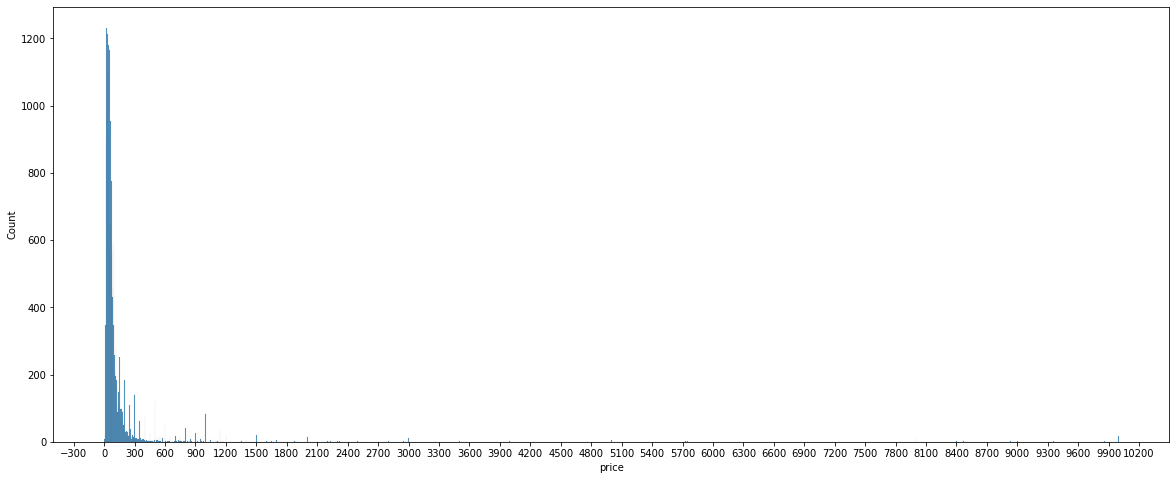

In [10]:
#ranges and distribution of price data column from listing dataset
fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(data=df, x="price")
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

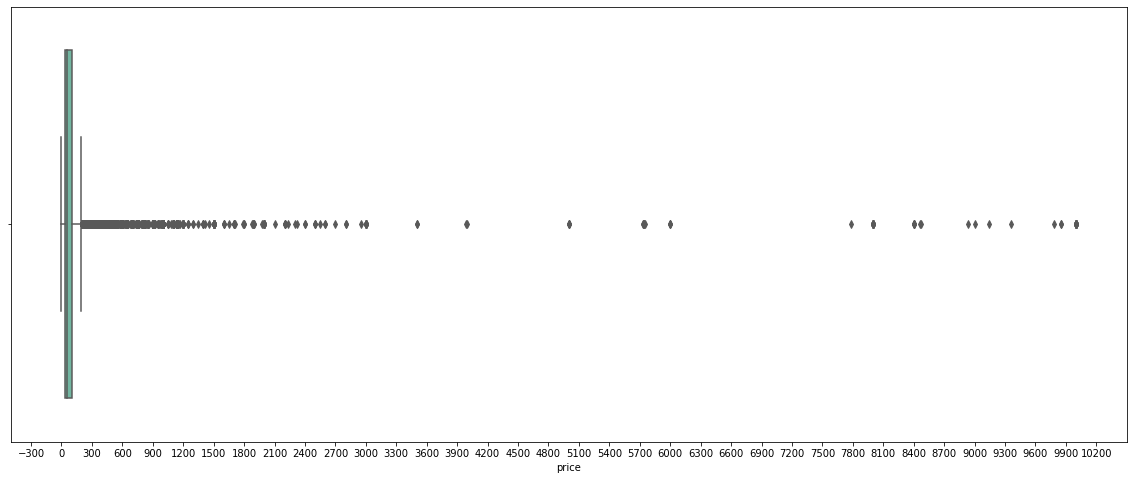

In [11]:
# Box plot of  price data column from listing dataset
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data = df, x = 'price', orient="h", palette="Set2")
ax.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#sns.boxplot(data=tips, )

In [12]:
df['price'].quantile(0.95)

350.0

As 95 percent of the data is contained within the 350. We will remove all the price rows above 350 and as well as zero

In [13]:
# removing the outliers
df.drop(df[ (df['price'] > 350) | (df['price'] == 0) ].index, axis=0, inplace=True)

In [14]:
#to find number of NaN values
df.isna().sum()

host_is_superhost               498
host_has_profile_pic            498
host_identity_verified          498
neighbourhood                     0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
beds                            389
amenities                         0
price                             0
minimum_nights                    0
review_scores_rating           5247
review_scores_accuracy         5259
review_scores_cleanliness      5256
review_scores_checkin          5257
review_scores_communication    5257
review_scores_location         5260
review_scores_value            5261
reviews_per_month              5000
instant_bookable                  0
dtype: int64

In [15]:
df[df['host_identity_verified'].isna()]

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,beds,amenities,price,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable
id,,,,,,,,,,,,,,,,,,,,,,
59923,NaN,NaN,NaN,Palacio,40.42103,-3.71038,Private room in guest suite,Private room,1,1.0,"[""Elevator"", ""Paid parking on premises"", ""Paid...",40.0,1,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0.15,f
163429,NaN,NaN,NaN,Trafalgar,40.43765,-3.70408,Entire loft,Entire home/apt,4,2.0,"[""Kitchen"", ""Paid parking on premises"", ""Dryer...",65.0,90,95.0,10.0,9.0,10.0,10.0,10.0,9.0,0.07,f
424816,NaN,NaN,NaN,Cuatro Caminos,40.45399,-3.69957,Private room in apartment,Private room,1,1.0,"[""Dishwasher"", ""Bed linens"", ""Refrigerator"", ""...",30.0,90,85.0,9.0,10.0,8.0,9.0,9.0,8.0,0.04,f
435010,NaN,NaN,NaN,Palacio,40.41275,-3.70862,Private room in apartment,Private room,2,1.0,"[""Heating"", ""Washer"", ""Coffee maker"", ""TV"", ""H...",25.0,2,91.0,10.0,9.0,10.0,9.0,10.0,9.0,1.88,f
529690,NaN,NaN,NaN,Palacio,40.41004,-3.71233,Entire apartment,Entire home/apt,6,4.0,"[""Kitchen"", ""Smoke alarm"", ""Hangers"", ""Iron"", ...",100.0,2,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.13,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48635732,NaN,NaN,NaN,Los Angeles,40.35288,-3.69454,Private room in apartment,Private room,1,1.0,"[""Free parking on premises"", ""Extra pillows an...",13.0,1,100.0,10.0,9.0,10.0,10.0,9.0,9.0,2.00,t
48856327,NaN,NaN,NaN,Puerta del Angel,40.41201,-3.73571,Private room in apartment,Private room,2,1.0,"[""Kitchen"", ""Fire extinguisher"", ""Body soap"", ...",22.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
48932231,NaN,NaN,NaN,Quintana,40.43595,-3.64937,Private room in apartment,Private room,1,1.0,"[""Kitchen"", ""Dryer"", ""Hangers"", ""Iron"", ""Shamp...",20.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t


It can be observed that similar host columns are also NaN values

In [16]:
def fill_NaNs(Dataframe, column_list, with_value):
    '''
    Fill the NaN values of the column from the Dataframe with appropiate method
    INPUT:
    Dataframe: The DataFrame you want to be manipulated
    column_list: The columns in the DataFrame that you want to be manipulated
    with_value: The value with Nan needs to be filled
    OUTPUT: None
    '''
    if with_value == 'mean':
        for i in column_list:
            Dataframe[i].fillna(value=df[i].mean(), inplace = True)
    elif with_value == 'median':
        for i in column_list:
            Dataframe[i].fillna(value=df[i].median(), inplace = True)
    elif with_value == 'mode':
        for i in column_list:
            Dataframe[i].fillna(value=df[i].mode(), inplace = True)
    else:
        for i in column_list:
            Dataframe[i].fillna(value=with_value, inplace = True)        
    

As NaN values resulted from most likely being a False value

In [17]:
#fill the NaN values with False
host_list = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']
fill_NaNs(df, host_list, 'f')

In [18]:
df.isnull().sum()

host_is_superhost                 0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood                     0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
beds                            389
amenities                         0
price                             0
minimum_nights                    0
review_scores_rating           5247
review_scores_accuracy         5259
review_scores_cleanliness      5256
review_scores_checkin          5257
review_scores_communication    5257
review_scores_location         5260
review_scores_value            5261
reviews_per_month              5000
instant_bookable                  0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='beds', ylabel='Density'>

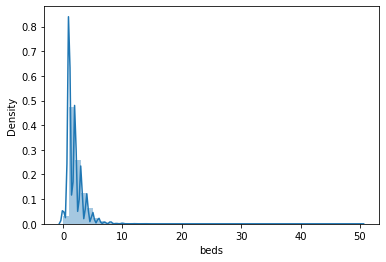

In [19]:
sns.distplot(df['beds'])

As data is skewed, Median will help capture relevant details

In [20]:
#fill the NaN values with median
fill_NaNs(df, ['beds'], 'median')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='review_scores_rating', ylabel='Density'>

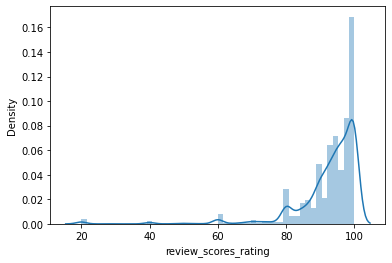

In [21]:
sns.distplot(df['review_scores_rating'])

As data is skewed, Median will help capture relevant details

In [22]:
#fill the NaN values with Mode
review_score_list = ['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
fill_NaNs(df, review_score_list, 'median')

# What are the important amenities in madrid?

In [23]:
#cleaning and spliting the amenities column
amenities_clean = df['amenities'].apply(lambda x: [amenity.replace('"', "").replace("[", "").replace("]", "") for amenity in x.split(",")])

**Visualization**

<AxesSubplot:>

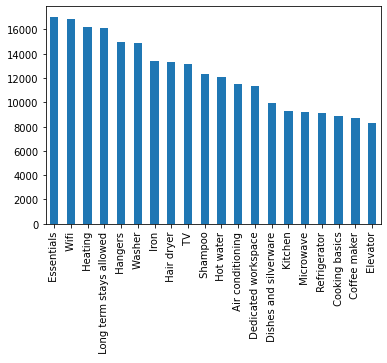

In [24]:
#encoding multiple labels into 0-1
mlb = MultiLabelBinarizer()
amenities_label = pd.DataFrame(mlb.fit_transform(amenities_clean), columns=mlb.classes_, index=amenities_clean.index)
amenities_count=amenities_label.sum().sort_values(ascending=False)
amenities_count.iloc[:20].plot(kind='bar')

As expected, essentials are on the top, followed by wifi. Interestingly, dedicated workspaces and coffee maker supplies as amenities indicate the modern work culture impact on the travel industry.

In [25]:
#creating a new dataframe with cleaned amenities column
df2 = pd.concat([df, amenities_label], axis=1, sort = False)
df2.drop(['amenities'], axis = 1, inplace = True)

In [26]:
#testing total number of null
df2.isnull().sum().sum()

0

# What are Average daily price negiborhood wise?

The Below map shows the average price per neighbourhood. It seems to indicate that affordable rental communities are scattered around the city rather than along the outskirts.

In [27]:
#Map of number of listings
lats = df2['latitude'].tolist()
lons = df2['longitude'].tolist()
locations = list(zip(lats, lons))
m = folium.Map(location = [40.4208, -3.6944], zoom_start=10, width=1200, height=500 )
FastMarkerCluster(data=locations).add_to(m)
m

In [28]:
geo = gpd.read_file("../input/madrid-airbnb-data/neighbourhoods.geojson")
average_price_review = df2.copy()
average_price_review['average_price'] = average_price_review['price']/average_price_review['accommodates']
average_price_review = average_price_review.groupby('neighbourhood')['average_price','review_scores_rating'].mean().sort_values(by = 'average_price', ascending=True)
average_price_review.rename({'review_scores_rating': 'average_review_scores_rating'}, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [29]:
average_price_review.iloc[:10]

,average_price,review_scores_rating
neighbourhood,,
San Cristobal,15.092982,93.368421
San Diego,16.377504,91.577465
Aeropuerto,16.515152,92.363636
El Pardo,16.750000,94.500000
Palomeras Sureste,17.109690,95.000000
Campamento,17.996377,96.434783
Los Rosales,18.231250,90.250000
Adelfas,18.318841,90.695652
Entrevías,19.264990,94.468085


Above table Shows the most affordable areas along with ratings.

# Visualization

In [30]:
#Map with average price in neigbourhood
geo = pd.merge(geo, average_price_review, on='neighbourhood', how='left')
map_dict = geo.set_index('neighbourhood')['average_price'].to_dict()
map3 = folium.Map(location=[40.4208, -3.6944], zoom_start=11)
choropleth = folium.Choropleth(data=geo,columns=["neighbourhood", "average_price"], geo_data = geo, key_on="feature.properties.neighbourhood",highlight=True,fill_color ='OrRd', width=600, height=300).add_to(map3)
folium.LayerControl().add_to(map3)
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],labels=True,sticky=False))
map3

The above map shows the average price per neighbourhood. It seems to indicate that affordable rental communities are scattered around the city rather than along the outskirts.

In [31]:
#selecting only top 25 neigborhood and blacking out remaining for visualization
geo1 = geo.sort_values(by=['average_price']).iloc[:25]
neg_geo1 = geo.sort_values(by=['average_price']).iloc[25:]
neg_geo1['average_price'] = np.nan
geo1 = pd.concat([geo1, neg_geo1])

In [32]:
#map of average pricer in top 25 of most affordable neighbourhood
map_dict1 = geo1.set_index('neighbourhood')['average_price'].to_dict()
map4 = folium.Map(location=[40.4208, -3.6944], zoom_start=11)
choropleth = folium.Choropleth(data=geo1,columns=["neighbourhood", "average_price"], geo_data = geo1, key_on="feature.properties.neighbourhood",highlight=True,fill_color ='OrRd', width=600, height=300).add_to(map4)
folium.LayerControl().add_to(map4)
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],labels=True,sticky=False))
map4

To verify by plotting the most affordable neighbourhoods(Top 25 out of 128). We conclude that affordable cities are not just along the city's borders but also in the core regions.

# What are the most important features to estimate airbnb price?

# Data Modeling

Standard regressor models are cross validated using kflod(10 splits) and model with least score is seleted for data modeling. Finally by hyperameter tuning. the graident boosting decision is fitted on to the data

In [33]:
#removing the price columns and preparing train and test dataset
price = df2['price']
df3 = df2.drop('price', axis = 1)
df3 = pd.get_dummies(df3)
X_train, X_test, Y_train, Y_test = train_test_split(df3, price, test_size = 0.2, random_state = 9)

In [34]:
#testing all the standard regressor models
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=3)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error', n_jobs = -1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -716113504804639219755264245760.000000 (390348965460213211242094919680.000000)
ScaledLASSO: -2242.072179 (48.152814)
ScaledEN: -2279.914186 (56.227006)
ScaledKNN: -2867.340753 (69.610573)
ScaledCART: -3880.228407 (127.645668)
ScaledGBM: -2070.274341 (52.173509)


As ScaledGBM has least score. It is selected for futher process

In [35]:
#finding best hyperparameters for using gridsearchCV
import numpy as np
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,200]), learning_rate = np.array([0.05, 0.1,  0.5]))
model = GradientBoostingRegressor()
kfold = KFold(n_splits=3)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold,n_jobs = -1)
grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-2316.948650 (48.584783) with: {'learning_rate': 0.05, 'n_estimators': 50}
-2156.712784 (46.071460) with: {'learning_rate': 0.05, 'n_estimators': 100}
-2065.488240 (47.428501) with: {'learning_rate': 0.05, 'n_estimators': 200}
-2155.222750 (48.235425) with: {'learning_rate': 0.1, 'n_estimators': 50}
-2070.621433 (52.759451) with: {'learning_rate': 0.1, 'n_estimators': 100}
-2021.448641 (44.596467) with: {'learning_rate': 0.1, 'n_estimators': 200}
-2080.621589 (37.792819) with: {'learning_rate': 0.5, 'n_estimators': 50}
-2127.185762 (44.303533) with: {'learning_rate': 0.5, 'n_estimators': 100}
-2180.570311 (36.909906) with: {'learning_rate': 0.5, 'n_estimators': 200}
Best: -2021.448641 using {'learning_rate': 0.1, 'n_estimators': 200}


In [36]:
#training the final model
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(**grid_result.best_params_)
model.fit(rescaled_X_train, Y_train)
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, predictions)

1807.3137588755667

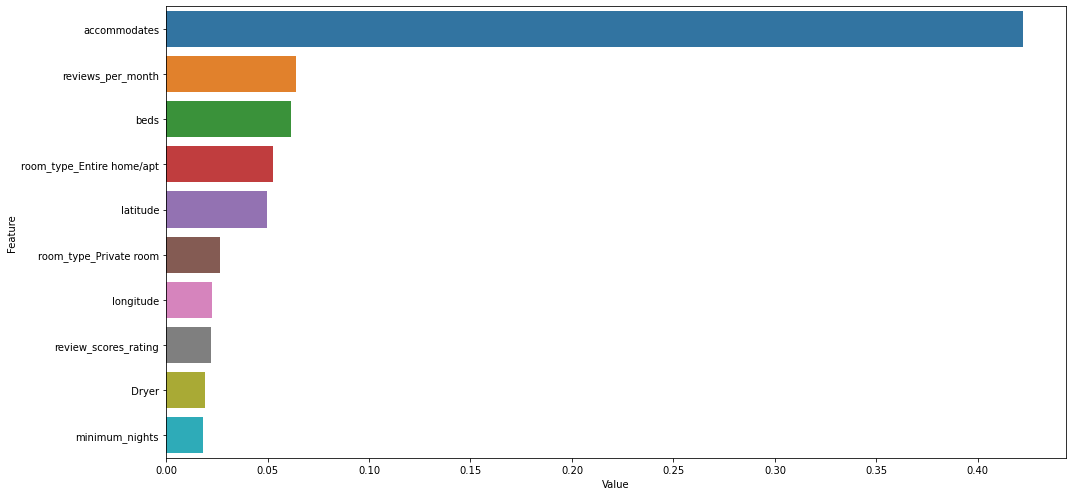

In [38]:
#Ploting the most important features for the trained model in the predicting the prices
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X_train.columns)), columns=['Value','Feature']).iloc[-10:]

plt.figure(figsize=(15, 7))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.tight_layout()
plt.show()

We observe that accommodates(Number of visitors) has a significant influence on the price. Then we have the influence of room type as private and entire home as it costs more than remaining types. The influence of location on the price is also clearly indicated from latitude and longitude in top features. As expected, the number of reviews, reviews score rating influences price listings. Interestingly, the review score cleanliness contribution shows the interest of travellers in the cleanliness of the house more than check-in, communication, and location scores.

# Evaluate the Results
Results are showcased in the medium blog post link: [Link](https://anudeeppeela9.medium.com/madrid-airbnb-what-are-affordable-neighbourhoods-for-rentals-ddbdaa1a7f2)